In [53]:
import sys
import pandas as pd
import numpy as np
import math
import warnings
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [2]:
path ='C:/Users/clyde/Documents/Thinkful/Data Science Bootcamp/Unit-2/Lesson 4/table_8_offenses_known_to_law_enforcement_florida_by_city_2013.csv'

In [4]:
crime = pd.read_csv(path,header=4)
crime.drop(columns=['Rape\n(revised\ndefinition)1'],axis=1)
int(crime.loc[10]['Population'].replace(',',''))

37357

In [5]:
crime['Population'] = crime['Population'].apply(lambda x: float(str(x).replace(',','')))
crime['Population_2'] = crime['Population'].apply(lambda x: float(str(x).replace(',',''))**2)

In [7]:
crime['Robbery']= crime['Robbery'].apply(lambda x: str(x).replace('\'\'',''))
crime['Robbery']= crime['Robbery'].apply(lambda x: float(str(x).replace(',','')))
crime['Robbery']= np.where(crime['Robbery']>0, 1, 0)

In [8]:
crime['Murder'] = np.where(crime[crime.columns[3]]>0, 1, 0)

In [9]:
crime['Aggrevated'] = crime[crime.columns[7]].apply(lambda x: str(x).replace('\'\'',''))
crime['Aggrevated'] = crime[crime.columns[7]].apply(lambda x: float(str(x).replace(',','')))

,Population,Population_2,Robbery,Murder
count,289.000000,2.890000e+02,292.000000,292.000000
mean,29503.896194,3.381749e+09,0.818493,0.356164
std,50199.491854,1.451428e+10,0.386099,0.479687
min,90.000000,8.100000e+03,0.000000,0.000000
25%,3472.000000,1.205478e+07,1.000000,0.000000
50%,11890.000000,1.413721e+08,1.000000,0.000000
75%,35493.000000,1.259753e+09,1.000000,1.000000
max,418394.000000,1.750535e+11,1.000000,1.000000


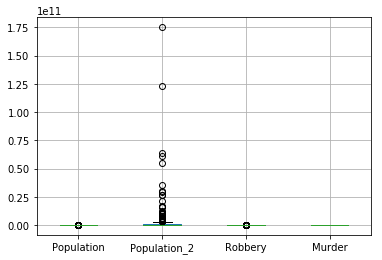

In [11]:
features = pd.DataFrame()
features[['Population','Population_2','Robbery','Murder','Aggrevated']] = crime[['Population','Population_2','Robbery','Murder','Aggrevated']]
features = features.drop(features['Population'].idxmax(axis=0))
features['Property']= crime[crime.columns[8]].apply(lambda x: float(str(x).replace(',','')))
features[['Population','Population_2','Robbery','Murder']].boxplot()
features[['Population','Population_2','Robbery','Murder']].describe()

In [54]:
egr = linear_model.LinearRegression()
X = features[['Population','Population_2','Robbery','Murder','Aggrevated']]
X['Property']= crime[crime.columns[8]].apply(lambda x: float(str(x).replace(',','')))

In [55]:
X = X.dropna(axis=0,how='any')
X = X.drop(0)
X_temp = X
Y_temp = X['Property']
X_feat1 = X_temp[['Population','Population_2','Robbery','Murder','Aggrevated']]
Y_feat1 = Y_temp
Y_feat2 = np.sqrt(Y_temp)
Y_feat3 = Y_temp**2
Y_feat4 = np.log(Y_temp+sys.float_info.epsilon)

In [22]:
regr = linear_model.LinearRegression()
regr.fit(X_feat1, Y_feat1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_feat1, Y_feat1))


Coefficients: 
 [ 2.34008253e-02 -4.34956347e-08 -4.77925039e+01 -1.70569900e+02
  6.86867837e+00]

Intercept: 
 -29.556814182714334

R-squared:
0.9288176370249821


In [24]:
# Extract predicted values.
predicted = regr.predict(X_feat1).ravel()
actual = Y_feat1
# Calculate the error, also called the residual.
residual = actual - predicted

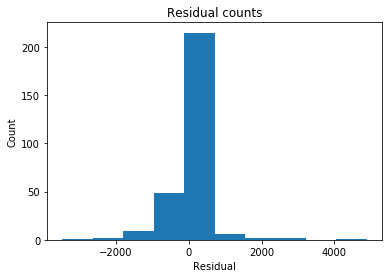

In [25]:
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

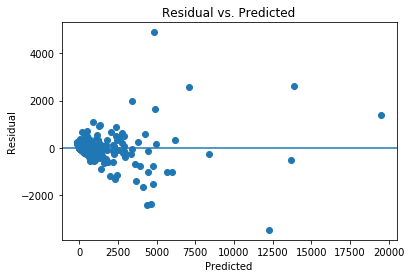

In [26]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [29]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'Property ~ Population+Population_2+Robbery+Murder+Aggrevated'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features).fit()

In [30]:
lm.params

Intercept      -2.962890e+01
Population      2.341080e-02
Population_2   -4.350929e-08
Robbery        -4.921798e+01
Murder         -1.693659e+02
Aggrevated      6.867796e+00
dtype: float64

# The above features explain 92% of the data variation

In [32]:
lm.rsquared

0.9288387856451086

In [31]:
lm.pvalues

Intercept       7.316509e-01
Population      1.583526e-28
Population_2    1.028342e-09
Robbery         6.295160e-01
Murder          7.126424e-02
Aggrevated      1.524014e-51
dtype: float64

# Remove the p-value > .05

In [33]:
linear_formula = 'Property ~ Population+Population_2+Aggrevated'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features).fit()

# Features still explain ~ 92% of the data

In [34]:
lm.rsquared

0.9278771193164538

# Transform Output Variable by using Log to improve homoscedasticity

In [39]:
Y_feat1 = np.log(Y_temp+sys.float_info.epsilon)

In [60]:
regr = linear_model.LinearRegression()
regr.fit(X_feat1, Y_feat1)
regr1 = linear_model.LinearRegression()
regr1.fit(X_feat1,Y_feat2)
regr2 = linear_model.LinearRegression()
regr2.fit(X_feat1,Y_feat3)
regr3 = linear_model.LinearRegression()
regr3.fit(X_feat1,Y_feat4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print('Normal Feature      %f: Regression Coefficient^2 %f',regr.score(X_feat1, Y_feat1))
print('Square Root Feature %f: Regression Coefficient^2 %f',regr1.score(X_feat1, Y_feat2))
print('Sqared Feature      %f: Regression Coefficient^2 %f',regr2.score(X_feat1, Y_feat3))
print('Log Feature         %f: Regression Coefficient^2 %f',regr3.score(X_feat1, Y_feat4))


Coefficients: 
 [ 2.34008253e-02 -4.34956347e-08 -4.77925039e+01 -1.70569900e+02
  6.86867837e+00]

Intercept: 
 -29.556814182714334

R-squared:
Normal Feature      %f 0.9288176370249821
Square Root Feature %f 0.9285012819860967
Sqared Feature      %f 0.8585419950282553
Log Feature         %f 0.35621605531664324


In [82]:
# Extract predicted values.
predicted1 = regr.predict(X_feat1).ravel()
predicted2 = regr1.predict(X_feat1).ravel()
predicted3 = regr2.predict(X_feat1).ravel()
predicted4 = regr3.predict(X_feat1).ravel()

actual  = Y_feat1
actual1 = Y_feat2
actual2 = Y_feat3
actual3 = Y_feat4

# Calculate the error, also called the residual.
residual   = actual - predicted1
residual1  = actual1- predicted2
residual2  = actual2- predicted3
residual3  = actual3- predicted4

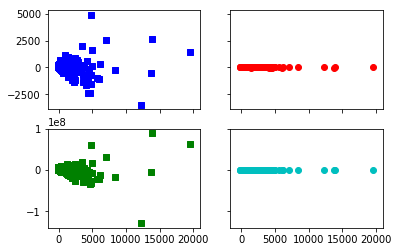

In [86]:
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row')
ax[0,0].scatter(predicted, residual,  c='b', marker="s", label='Feature 1')
ax[0,1].scatter(predicted,residual1,  c='r', marker="o", label='Feature 2')
ax[1,0].scatter(predicted,residual2,  c='g', marker="s", label='Feature 3')
ax[1,1].scatter(predicted,residual3,  c='c', marker="o", label='Feature 4')
plt.show()

# Square Root Feature gives best performance on Homoscedasticity

In [ ]:
features['Property'] = Y_temp2


# Removing important p-values to determine their effect on r^2

In [ ]:
linear_formula = 'Property ~ Population+Population_2+Aggrevated'

# Fit the model to our data using the formula.
lm_sqrt = smf.ols(formula=linear_formula, data=features).fit()

In [89]:
lm_sqrt.rsquared


0.9278771193164538

In [91]:
lm_sqrt.pvalues

Intercept       7.187477e-02
Population      6.786740e-30
Population_2    3.406400e-09
Aggrevated      1.657257e-52
dtype: float64

# Removing Aggrevated Assault

In [94]:
linear_formula = 'Property ~ Population'

# Fit the model to our data using the formula.
lm_sqrt = smf.ols(formula=linear_formula, data=features).fit()
lm_sqrt.rsquared

0.8330053789103931

# Impact of feature selection on r-squared

In [100]:
linear_formula = 'Property ~ Population'

# Fit the model to our data using the formula.
lm_sqrt = smf.ols(formula=linear_formula, data=features).fit()
lm_sqrt.rsquared

0.8330053789103931

In [97]:
linear_formula = 'Property ~ Population_2'

# Fit the model to our data using the formula.
lm_sqrt = smf.ols(formula=linear_formula, data=features).fit()
lm_sqrt.rsquared

0.6999308750318032

In [95]:
linear_formula = 'Property ~ Aggrevated'

# Fit the model to our data using the formula.
lm_sqrt = smf.ols(formula=linear_formula, data=features).fit()
lm_sqrt.rsquared

0.8863071140852385

In [98]:
linear_formula = 'Property ~ Murder'

# Fit the model to our data using the formula.
lm_sqrt = smf.ols(formula=linear_formula, data=features).fit()
lm_sqrt.rsquared

0.20167522353391998

In [99]:
linear_formula = 'Property ~ Robbery'

# Fit the model to our data using the formula.
lm_sqrt = smf.ols(formula=linear_formula, data=features).fit()
lm_sqrt.rsquared

0.04822953731980728

# Performing a PCA on the chosen features will further highlight which features are most important (verification of p-value method)

In [110]:
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_feat = X[['Population','Population_2','Robbery','Murder','Aggrevated']]
df_features = StandardScaler().fit_transform(X_feat)
Xt = df_features.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)


Covariance Matrix:
 [[1.0034965  0.89123585 0.24511992 0.4559712  0.88158249]
 [0.89123585 1.0034965  0.106168   0.26371836 0.88978741]
 [0.24511992 0.106168   1.0034965  0.30459144 0.18951722]
 [0.4559712  0.26371836 0.30459144 1.0034965  0.43373419]
 [0.88158249 0.88978741 0.18951722 0.43373419 1.0034965 ]]


C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\clyde\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [113]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 5).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov))

Eigenvector 1: 
[[-0.54619107]
 [-0.51767572]
 [-0.18840945]
 [-0.32658824]
 [-0.53993441]]
Eigenvalue 1: 3.0768838025253245
----------------------------------------
Eigenvector 2: 
[[-0.52086577]
 [ 0.76412864]
 [ 0.06090099]
 [ 0.17459731]
 [-0.33258551]]
Eigenvalue 2: 0.07742939259515276
----------------------------------------
Eigenvector 3: 
[[-0.64476344]
 [-0.10949934]
 [ 0.03621119]
 [-0.01791266]
 [ 0.75541901]]
Eigenvalue 3: 0.1208737822848326
----------------------------------------
Eigenvector 4: 
[[ 0.10523304]
 [ 0.31755613]
 [-0.78654708]
 [-0.49318351]
 [ 0.16185742]]
Eigenvalue 4: 1.0798246658818698
----------------------------------------
Eigenvector 5: 
[[ 0.05983543]
 [ 0.18784907]
 [ 0.58380252]
 [-0.78695938]
 [ 0.03165438]]
Eigenvalue 5: 0.6624708741953402
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.61323259 0.01543192 0.02409052 0.21521244 0.13203252]


# Figure above shows that population accounts for 61% of the variation in the data the next closest is aggrevated assault thus the final model will contain both of these features

# Final Model

In [114]:
linear_formula = 'Property ~ Population+Aggrevated'

# Fit the model to our data using the formula.
lm_sqrt = smf.ols(formula=linear_formula, data=features).fit()
lm_sqrt.rsquared

0.9184185733608465